In [1]:
import pandas as pd   # module to work with data in DataFrames.
import seaborn as sns  # module to plot DataFrames in an easy way
import numpy as np
import matplotlib.pyplot as plt
sns.set_context('notebook') # try: 'talk', 'poster', 'notebook'
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv('result_final.csv', encoding='utf-8')
df
df['sigma'] = pd.Categorical(df['sigma'], ["4", "7", "12", "20", "original"])

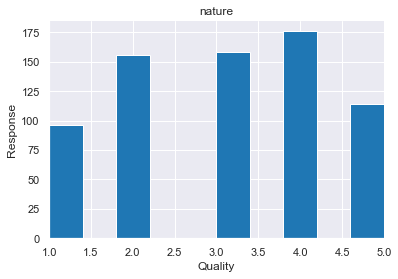

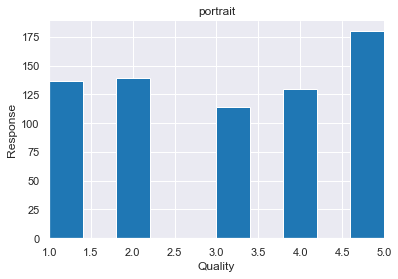

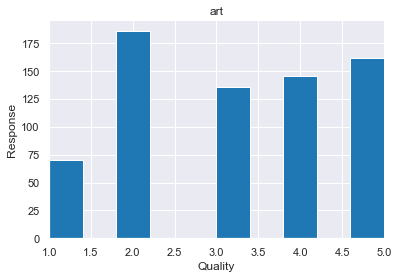

In [3]:
for category in df['category'].unique():
    d = df[df['category'] == category]
    plt.figure()
    plt.hist(d['response'])
    plt.xlabel('Quality')
    plt.ylabel('Response')
    plt.title(category)
    plt.xlim((1, 5))
    sns.despine()

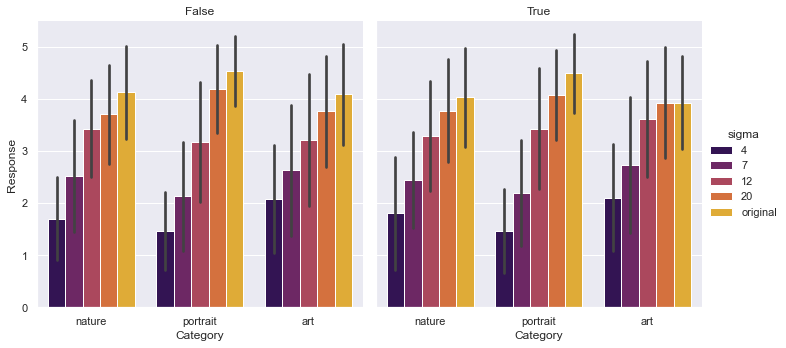

In [4]:
g = sns.catplot(x='category', y='response', data=df, hue='sigma',
                kind='bar', ci='sd', 
                palette='inferno',
               col='rotation')



g.set_ylabels('Response')
g.set_xlabels('Category')
g.set_titles('{col_name}')

#g.set(ylim = (1, 5))

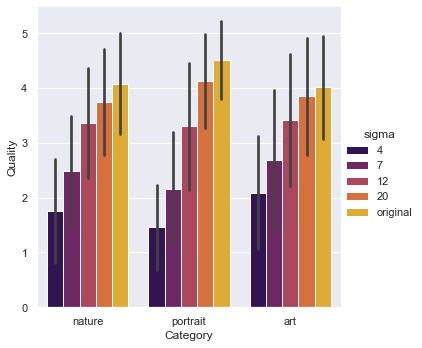

In [5]:
g = sns.catplot(x='category', y='response', data=df, hue='sigma',
                kind='bar', ci='sd', 
                palette='inferno')



g.set_ylabels('Quality')
g.set_xlabels('Category')
g.set_titles('{col_name}')

#g.set(ylim = (1, 5))

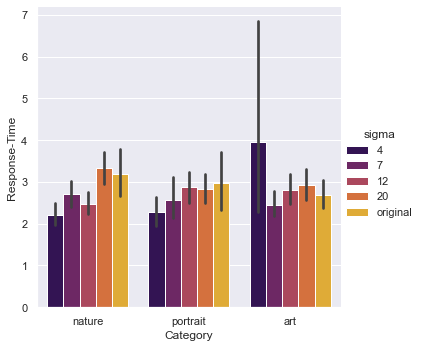

In [6]:
g = sns.catplot(x='category', y='resptime', data=df, hue='sigma',
                kind='bar', 
                palette='inferno')



g.set_ylabels('Response-Time')
g.set_xlabels('Category')
g.set_titles('{col_name}')

#g.set(ylim = (1, 5))

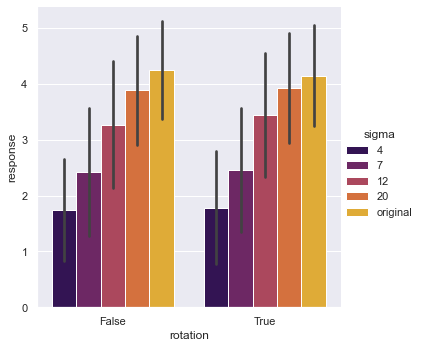

In [7]:
g = sns.catplot(x='rotation', y='response', data=df, hue='sigma',
                kind='bar', ci='sd', 
                palette='inferno')

g.set_titles('{col_name}')

#g.set(ylim = (1, 5))

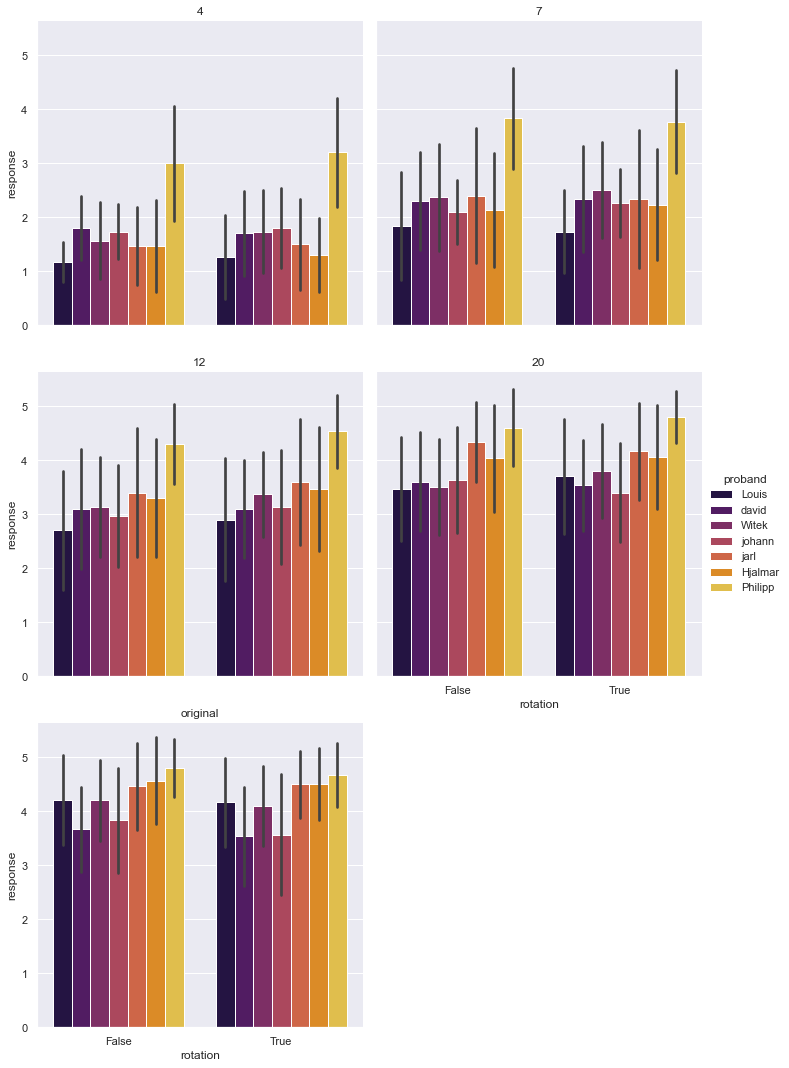

In [8]:
g = sns.catplot(x='rotation', y='response', data=df, hue='proband', col ='sigma',
                kind='bar', ci='sd', 
                palette='inferno', col_wrap=2)

g.set_titles('{col_name}')

#g.set(ylim = (1, 5))

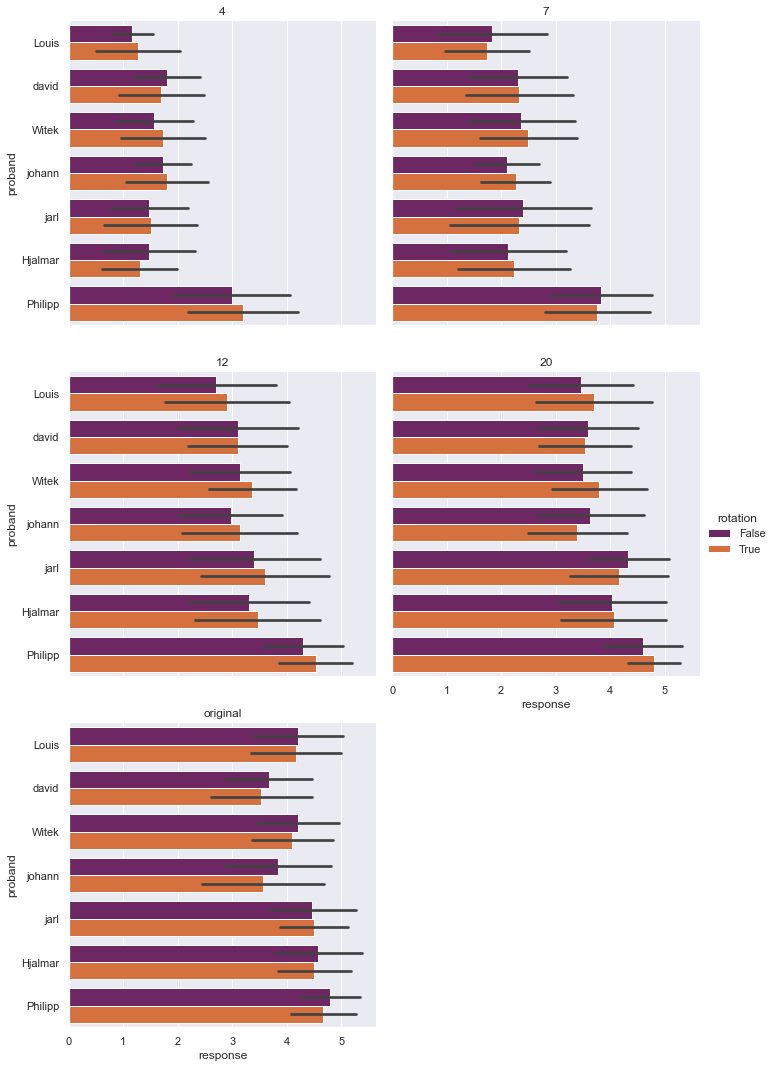

In [9]:
g = sns.catplot(x='response', y='proband', data=df, hue='rotation', col ='sigma',
                kind='bar', ci='sd', 
                palette='inferno', col_wrap=2)

g.set_titles('{col_name}')

#g.set(ylim = (1, 5))

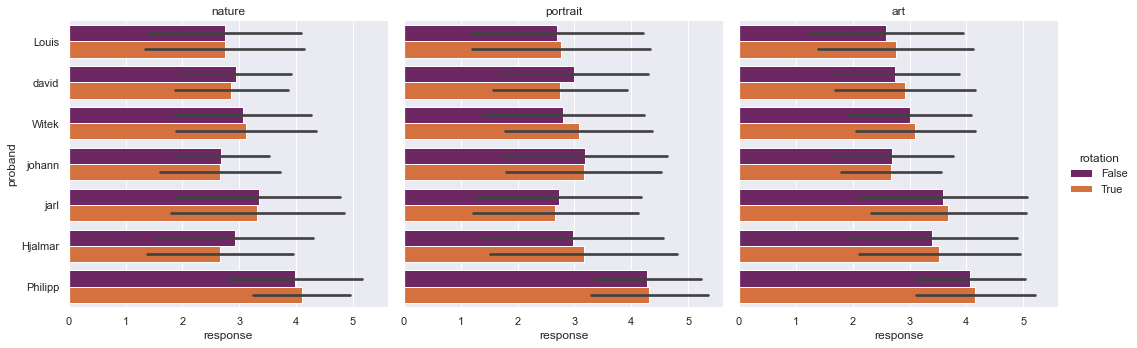

In [10]:
g = sns.catplot(x='response', y='proband', data=df, hue='rotation', col ='category',
                kind='bar', ci='sd', 
                palette='inferno')

g.set_titles('{col_name}')

#g.set(ylim = (1, 5))

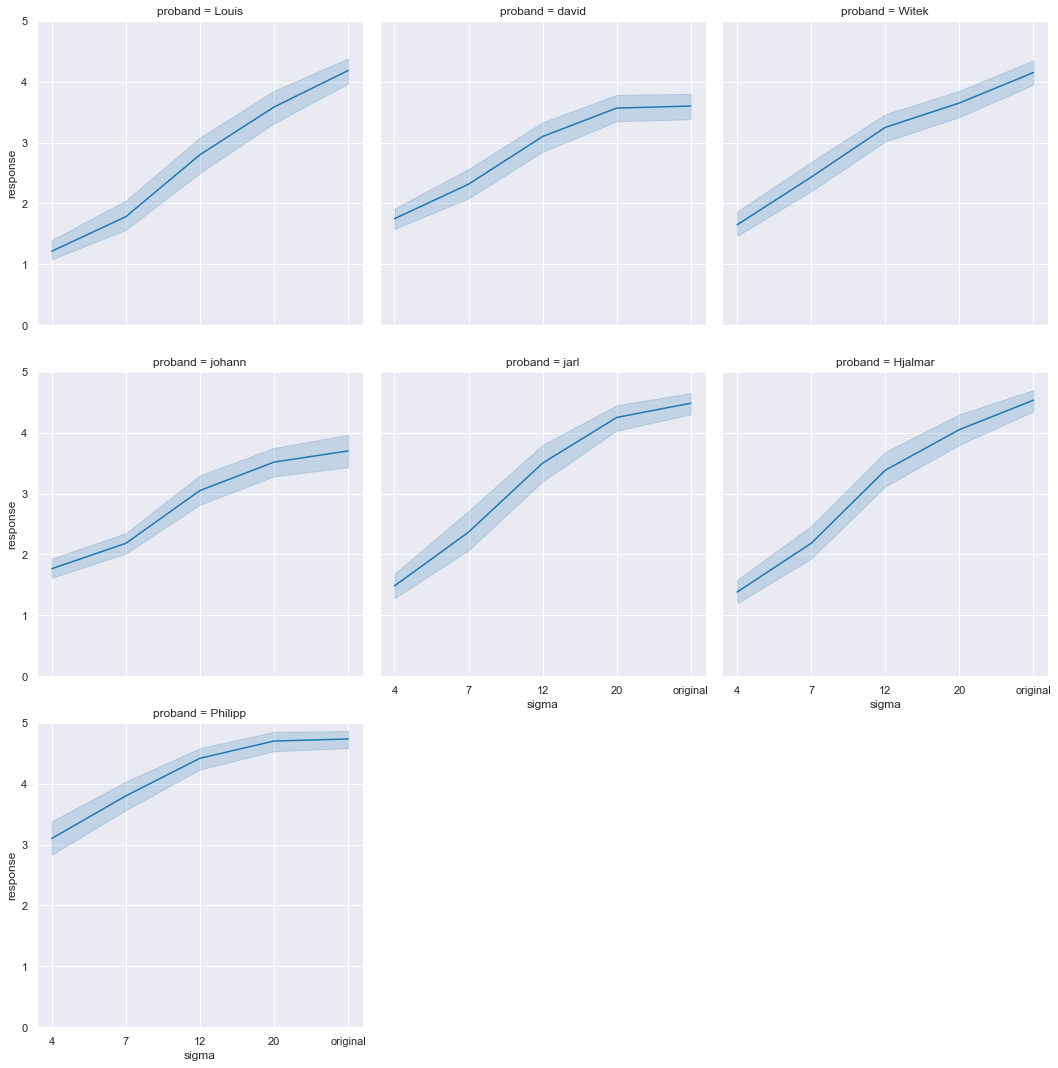

In [11]:
g = sns.relplot(x="sigma", y="response", kind="line", data=df, col='proband', col_wrap=3)
g.set(ylim = (0, 5))

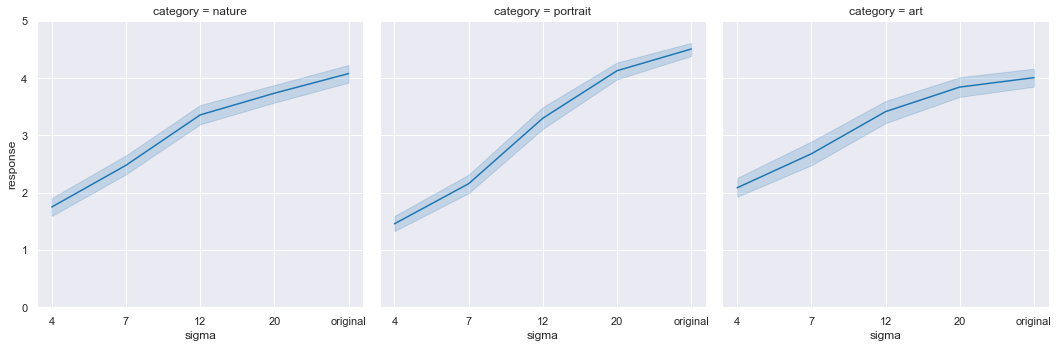

In [12]:
g = sns.relplot(x="sigma", y="response", kind="line", data=df, col='category')
g.set(ylim = (0, 5))

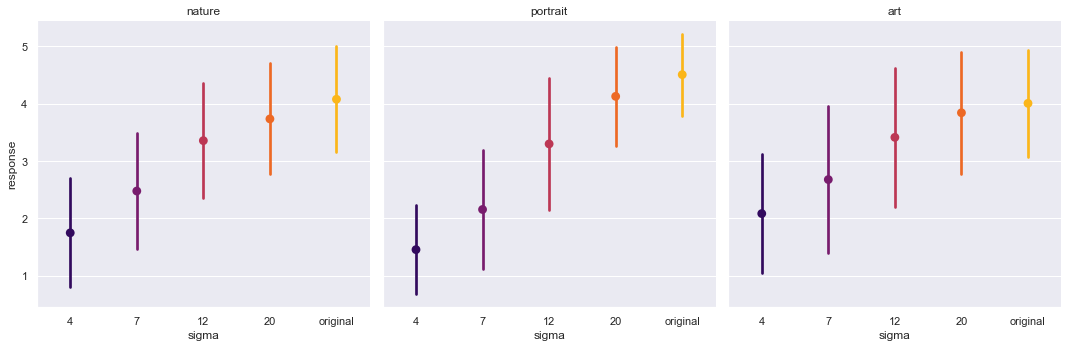

In [13]:
df['sigma'] = pd.Categorical(df['sigma'], ["4", "7", "12", "20", "original"])

g = sns.catplot(x='sigma', y='response', data=df, col ='category',
                kind='point', ci='sd',
                palette='inferno')

g.set_titles('{col_name}')

#g.set(ylim = (1, 5))

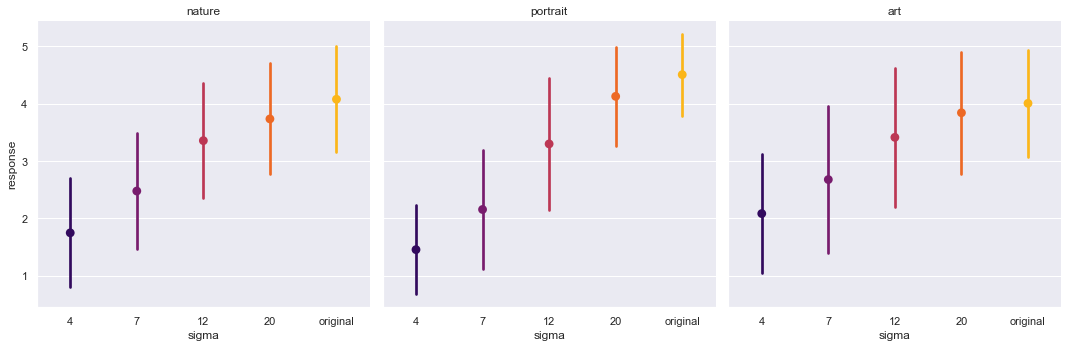

In [14]:
g = sns.catplot(x='sigma', y='response', data=df, col ='category',
                kind='point', ci='sd',
                palette='inferno')

g.set_titles('{col_name}')

#g.set(ylim = (1, 5))

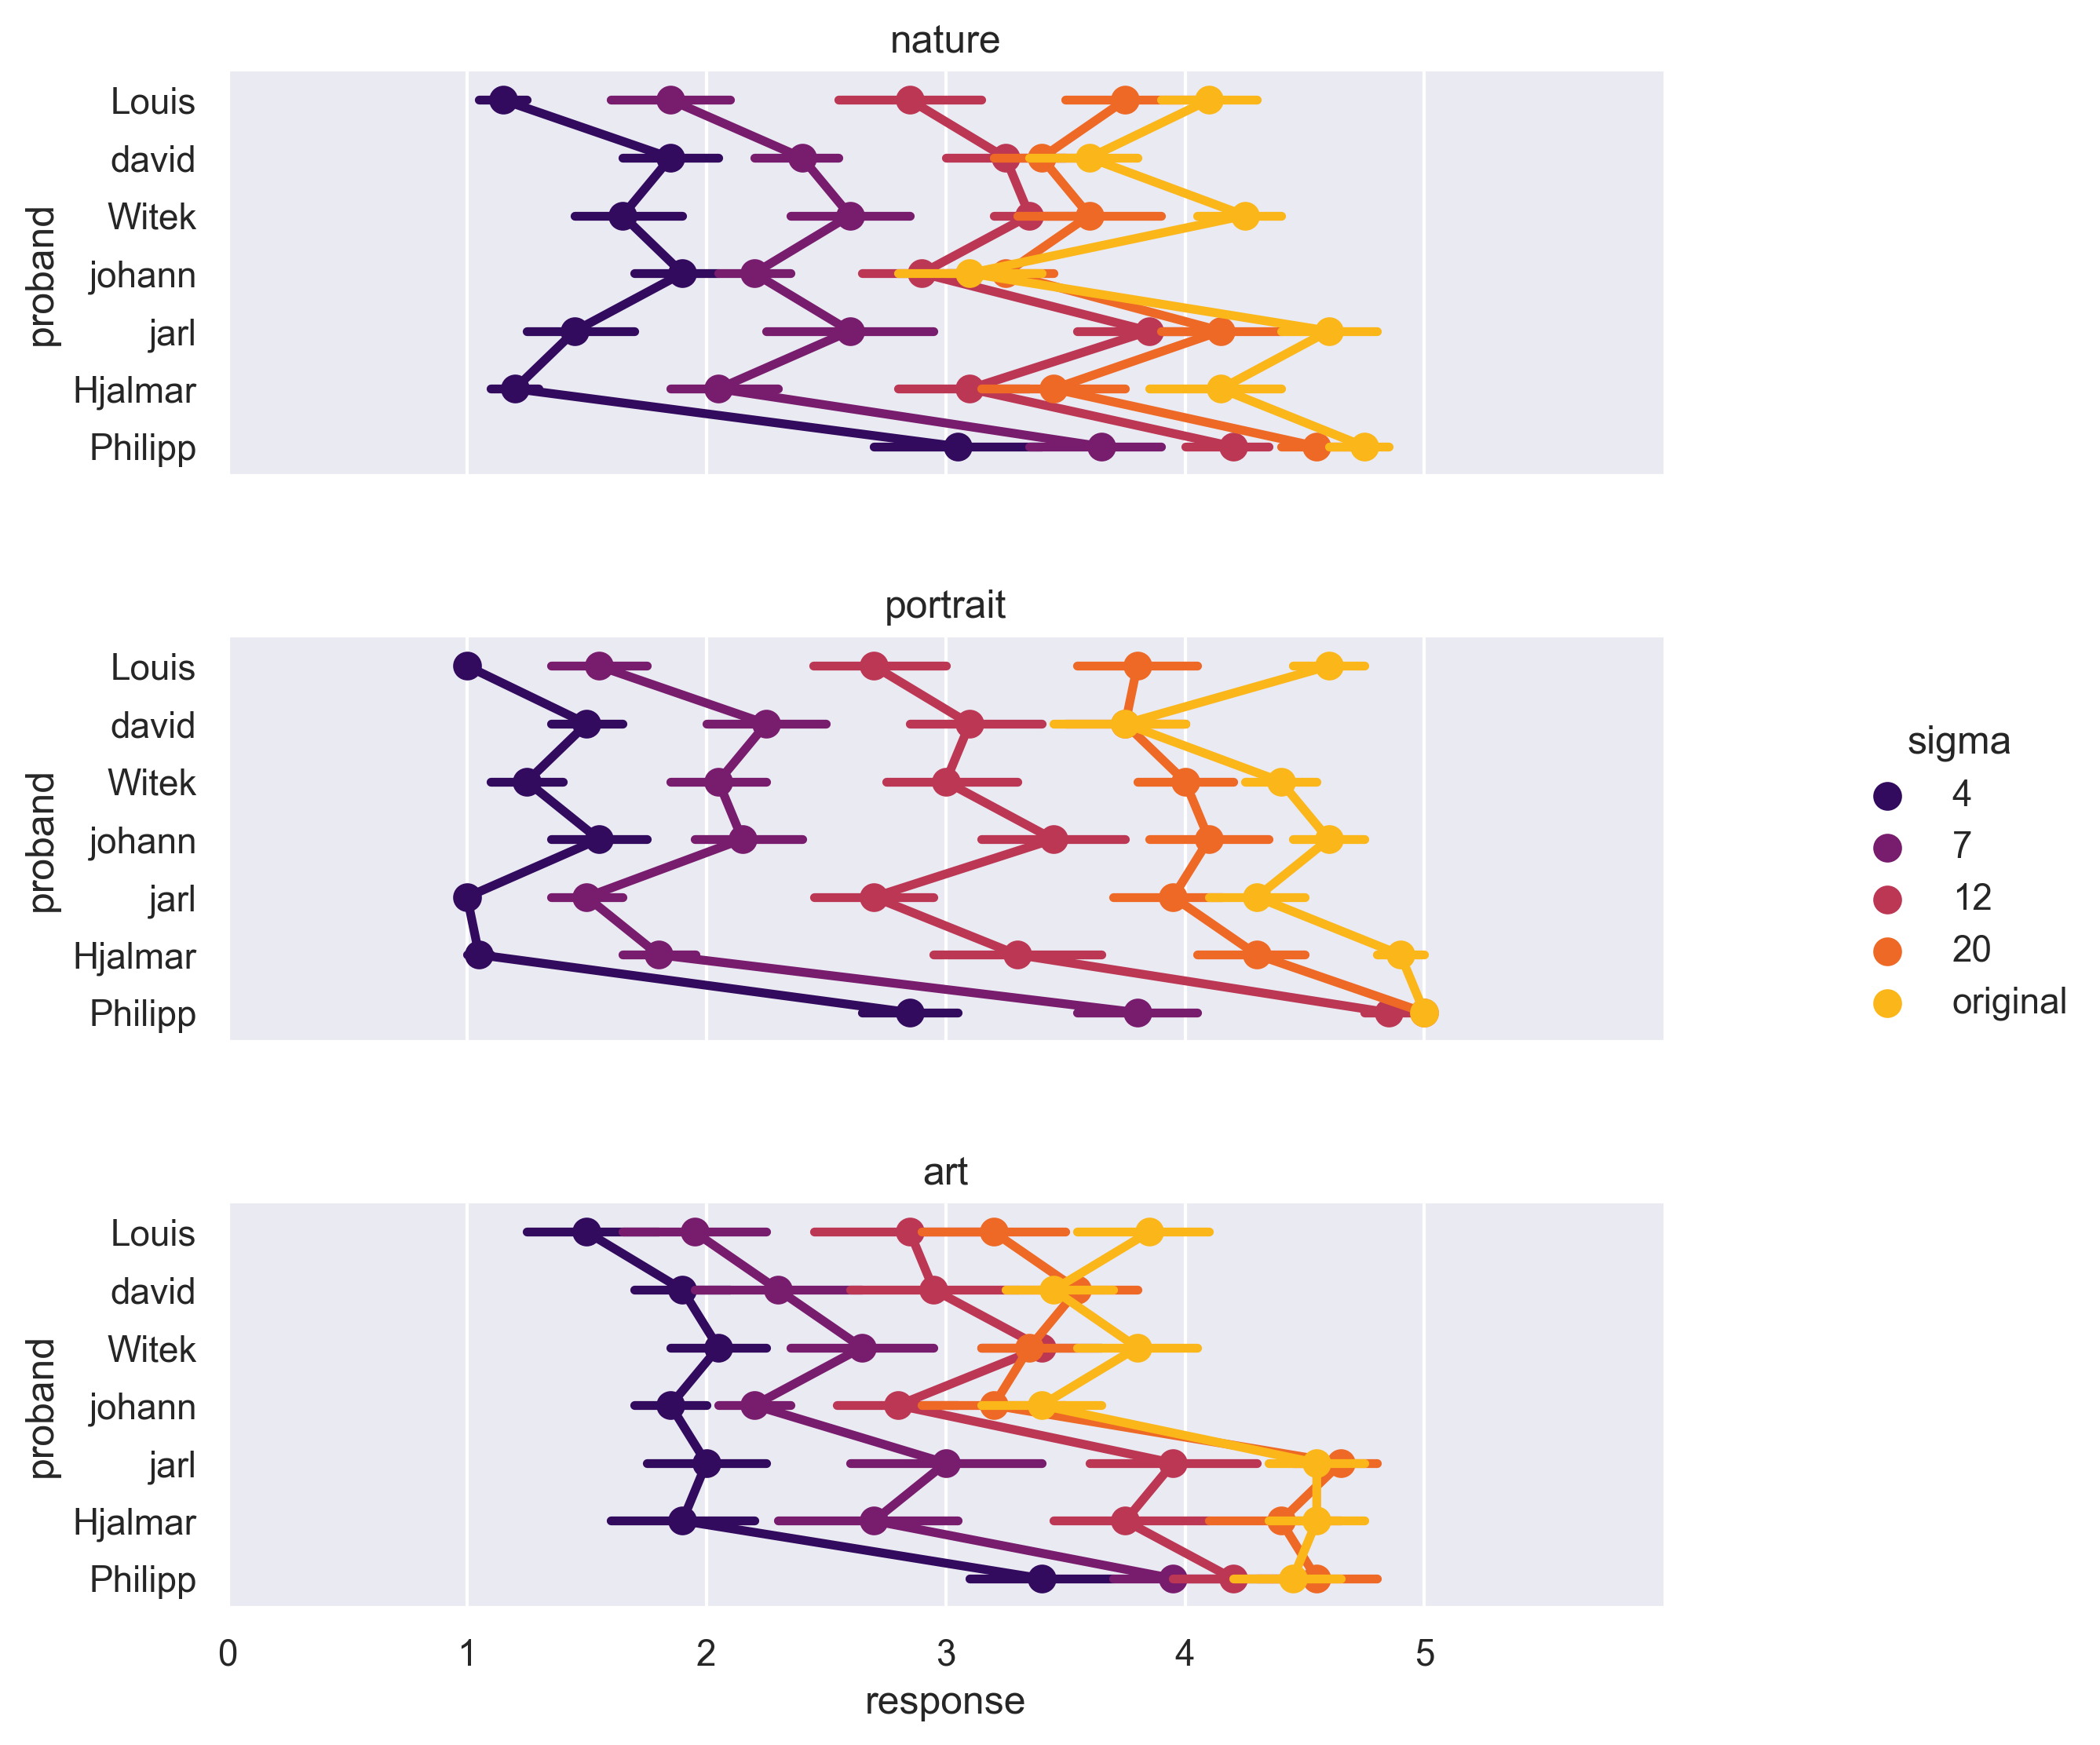

In [15]:
g = sns.catplot(x='response', y='proband', data=df, col ='category',
                kind='point', ci=80,
                palette='inferno', hue='sigma', col_wrap=1, estimator=np.mean)

g.set_titles('{col_name}')
g.fig.set_size_inches(10, 7)
plt.subplots_adjust(hspace=0.4)
g.fig.set_dpi(300)
g.set(xlim =(0.5, 6))
g.set(xticks=np.arange(0,6,1))

for ax in g.axes:
    plt.setp(g.axes[-1], visible=True)

In [16]:
test = df[df['proband'] == 'Louis']
test = test[test['sigma'] == '4']
test = test[test['category'] == 'portrait']
test['response'].mean()

1.0

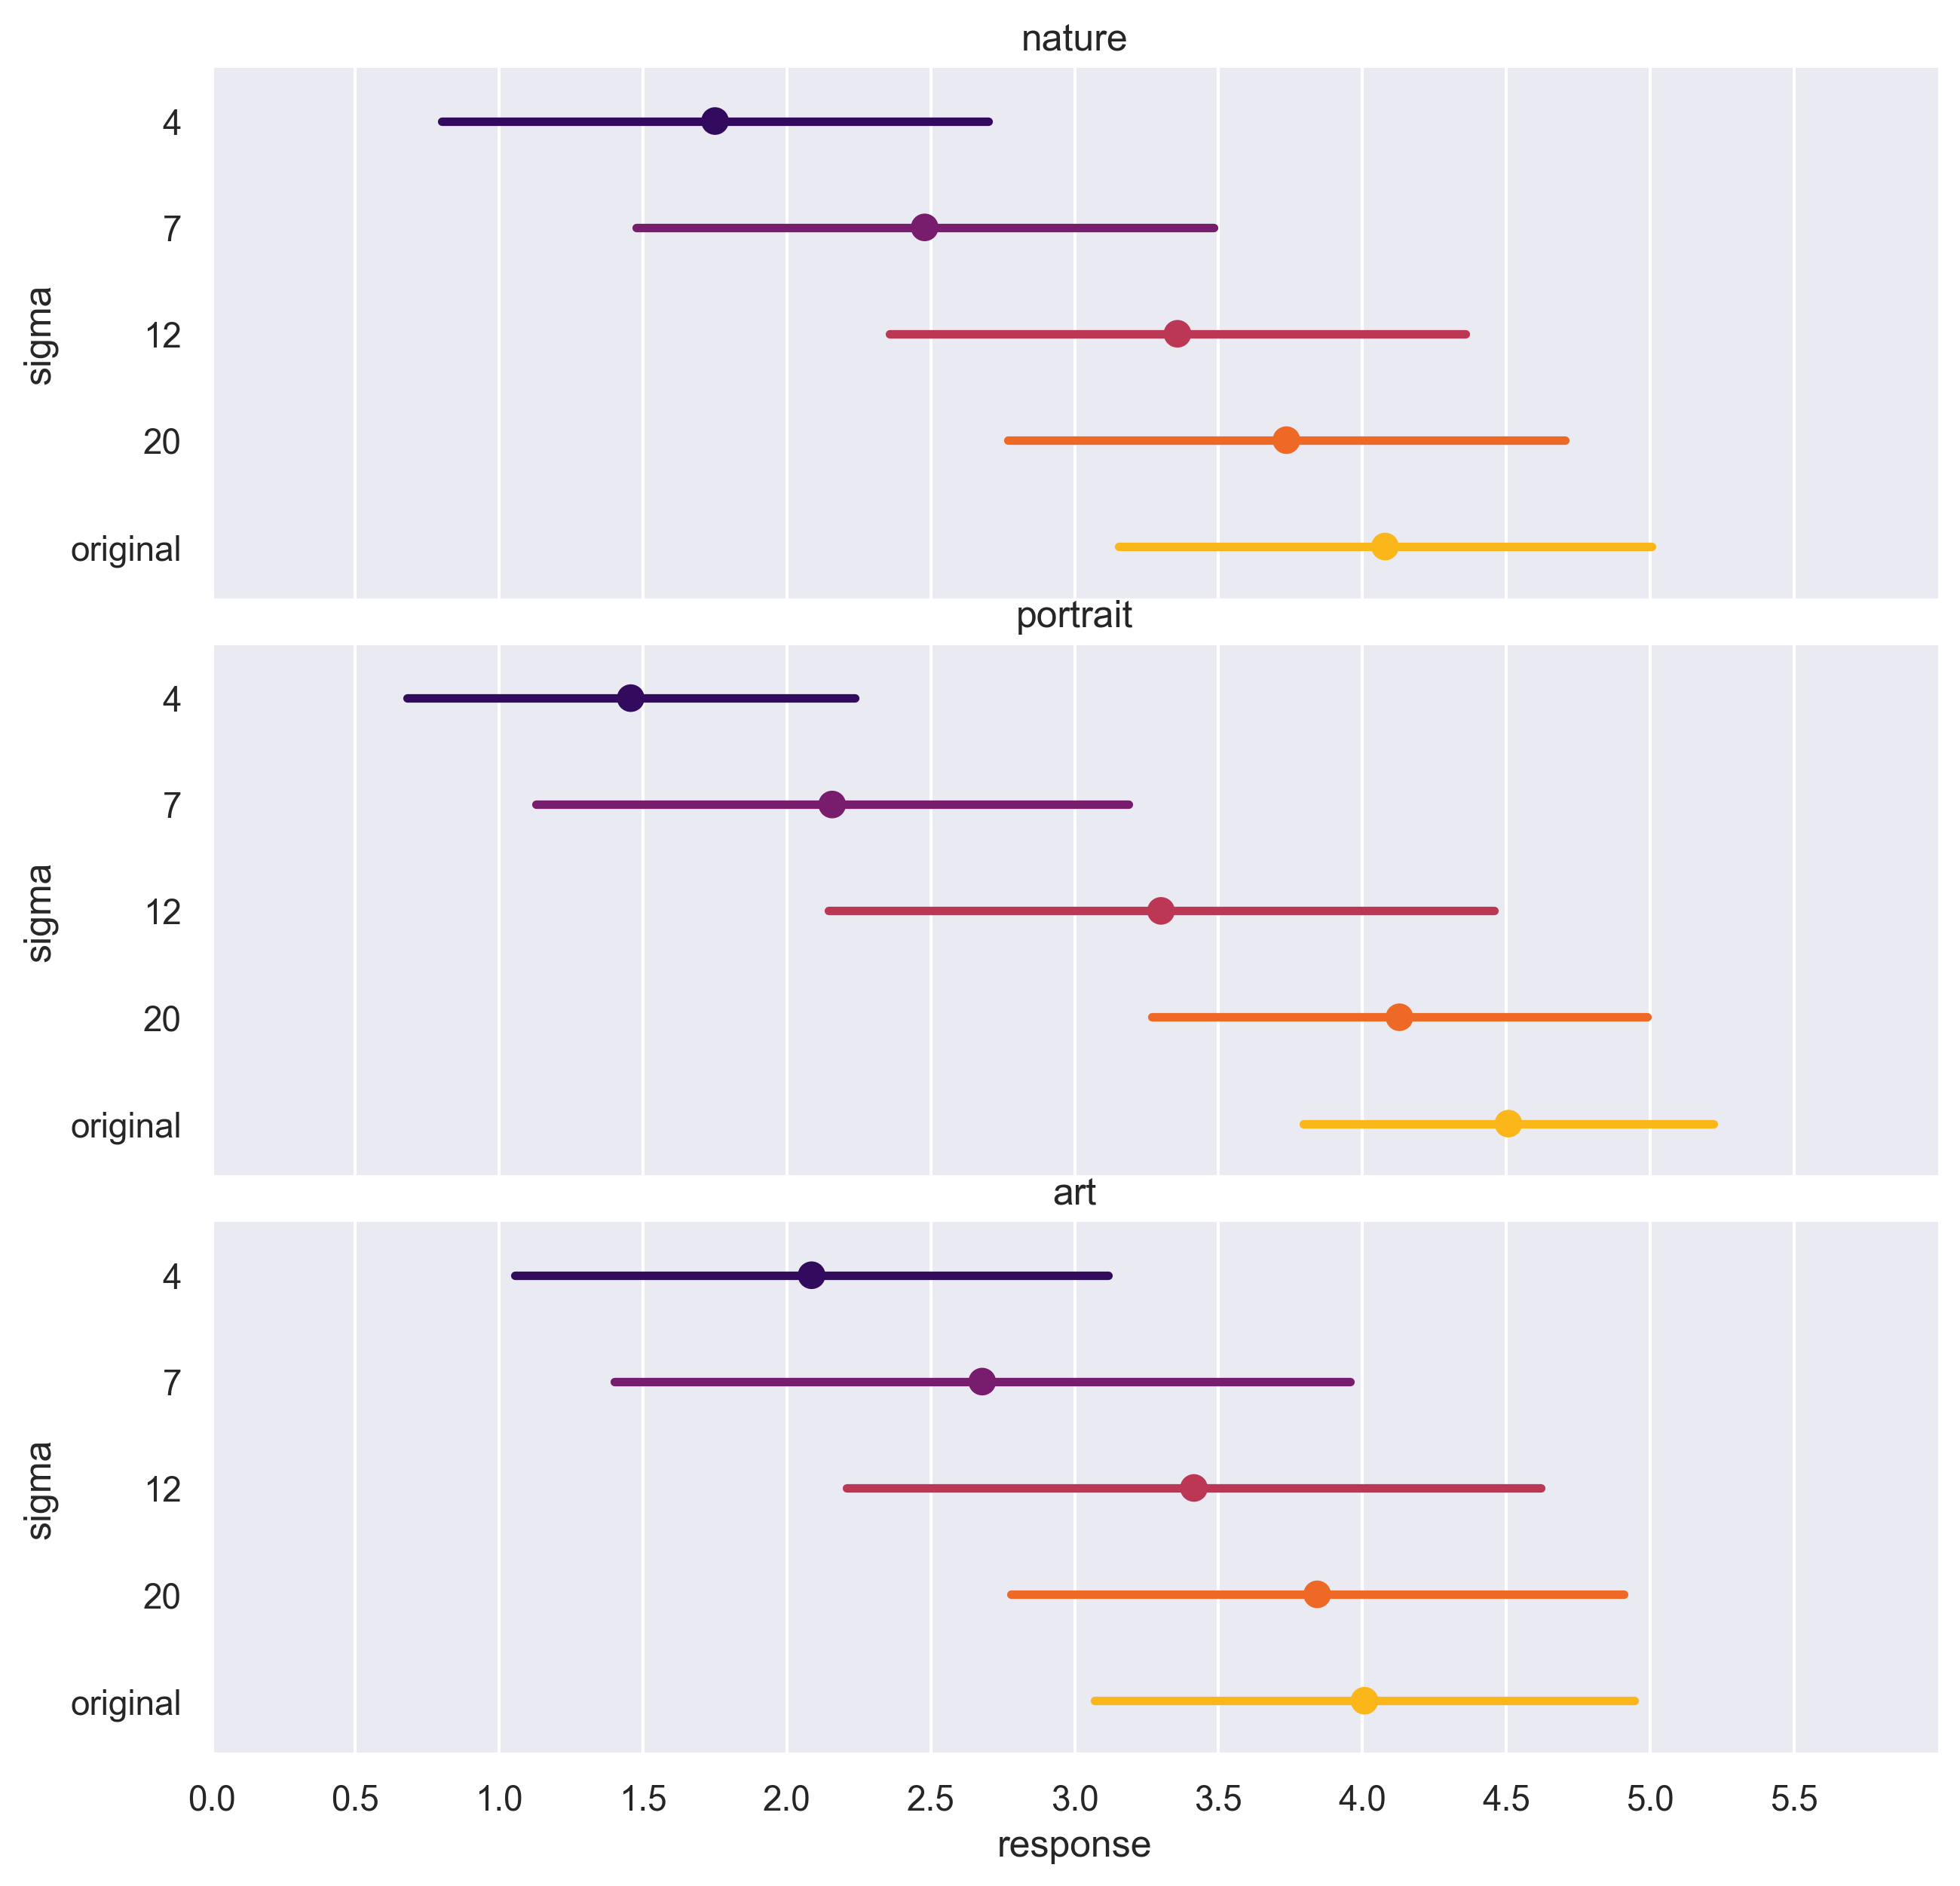

In [17]:
g = sns.catplot(x='response', y='sigma', data=df, col ='category',
                kind='point', ci='sd',
                palette='inferno', col_wrap=1)

g.set_titles('{col_name}')
g.fig.set_size_inches(10,8)
g.fig.set_dpi(300)
g.set(xlim =(0.5, 6))
g.set(xticks=np.arange(0,5.6,0.5))